# ARMA Models in StatsModels - Lab 

## Introduction

In this lesson, you'll fit an ARMA model using `statsmodels` to a real-world dataset. 


## Objectives

In this lab you will: 

- Decide the optimal parameters for an ARMA model by plotting ACF and PACF and interpreting them 
- Fit an ARMA model using StatsModels 

## Dataset

Run the cell below to import the dataset containing the historical running times for the men's 400m in the Olympic games.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)

data = pd.read_csv("winning_400m.csv")
data["year"] = pd.to_datetime(data["year"].astype(str))
data.set_index("year", inplace=True)
data.index = data.index.to_period("Y")

In [2]:
# Preview the dataset
data

,winning_times
year,
1900,49.4
1904,49.2
1908,50.0
1912,48.2
1920,49.6
1924,47.6
1928,47.8
1932,46.2
1936,46.5


Plot this time series data. 

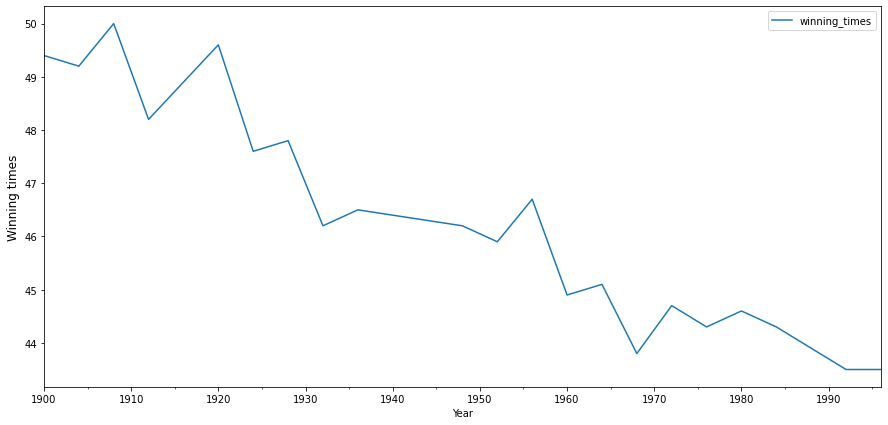

In [5]:
# Plot the time series
data.plot(figsize=(15,7))
plt.xlabel("Year")
plt.ylabel("Winning times", fontsize=12);

If you plotted the time series correctly, you should notice that it is not stationary. So, difference the data to get a stationary time series. Make sure to remove the missing values.

In [6]:
# Difference the time series
data_diff =data.diff().dropna()
data_diff

,winning_times
year,
1904,-0.2
1908,0.8
1912,-1.8
1920,1.4
1924,-2.0
1928,0.2
1932,-1.6
1936,0.3
1948,-0.3


Use `statsmodels` to plot the ACF and PACF of this differenced time series. 

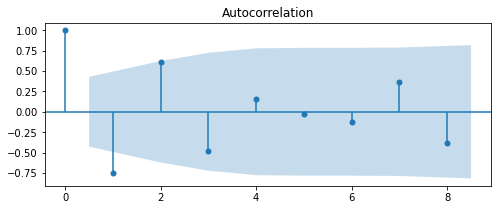

In [13]:
# Plot the ACF
from statsmodels.graphics.tsaplots import plot_acf
fig, ax = plt.subplots(figsize=(8, 3))
plot_acf(data_diff, ax=ax, lags=8) ;

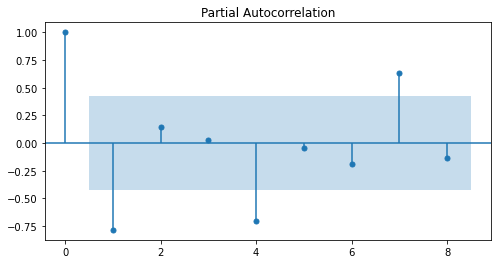

In [12]:
# Plot the PACF
from statsmodels.graphics.tsaplots import plot_pacf
fig, ax=plt.subplots(figsize=(8,4))
plot_pacf(data_diff, ax=ax, lags=8);  

Based on the ACF and PACF, fit an ARMA model with the right orders for AR and MA. Feel free to try different models and compare AIC and BIC values, as well as significance values for the parameter estimates. 

In [18]:
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.arima_model import ARIMA
mod_arma = ARIMA(data_diff, order=(1,0,0))
res_arma =mod_arma.fit()
res_arma.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:          winning_times   No. Observations:                   21
Model:                     ARMA(1, 0)   Log Likelihood                 -20.054
Method:                       css-mle   S.D. of innovations              0.618
Date:                Wed, 12 Jun 2024   AIC                             46.107
Time:                        15:15:56   BIC                             49.241
Sample:                    12-31-1904   HQIC                            46.787
                         - 12-31-1996                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.2885      0.080     -3.602      0.000      -0.445      -0.131
ar.L1.winning_times    -0.7186      0.137     -5.262      0.000      -0.986      -0.451
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.3916           +0.0000j            1.3916            0.5000
-----------------------------------------------------------------------------
"""

In [24]:
mod_arma2 = ARIMA(data_diff, order=(2,0,1))
res_arma2 =mod_arma2.fit()
res_arma2.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:          winning_times   No. Observations:                   21
Model:                     ARMA(2, 1)   Log Likelihood                 -18.955
Method:                       css-mle   S.D. of innovations              0.562
Date:                Wed, 12 Jun 2024   AIC                             47.911
Time:                        15:18:34   BIC                             53.133
Sample:                    12-31-1904   HQIC                            49.044
                         - 12-31-1996                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.2916      0.073     -4.018      0.000      -0.434      -0.149
ar.L1.winning_times    -1.6827      0.119    -14.199      0.000      -1.915      -1.450
ar.L2.winning_times    -0.7714      0.128     -6.022      0.000      -1.022      -0.520
ma.L1.winning_times     0.9999      0.132      7.550      0.000       0.740       1.260
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.0907           -0.3268j            1.1386           -0.4537
AR.2           -1.0907           +0.3268j            1.1386            0.4537
MA.1           -1.0001           +0.0000j            1.0001            0.5000
-----------------------------------------------------------------------------
"""

In [28]:
mod_arma3 = ARIMA(data_diff, order=(2,1,0))
res_arma =mod_arma3.fit()
res_arma.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:        D.winning_times   No. Observations:                   20
Model:                 ARIMA(2, 1, 0)   Log Likelihood                 -22.964
Method:                       css-mle   S.D. of innovations              0.729
Date:                Wed, 12 Jun 2024   AIC                             53.927
Time:                        15:22:49   BIC                             57.910
Sample:                    12-31-1908   HQIC                            54.705
                         - 12-31-1996                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.0148      0.065     -0.228      0.820      -0.142       0.112
ar.L1.D.winning_times    -1.2243      0.214     -5.732      0.000      -1.643      -0.806
ar.L2.D.winning_times    -0.3964      0.222     -1.789      0.074      -0.831       0.038
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.5442           -0.3714j            1.5883           -0.4624
AR.2           -1.5442           +0.3714j            1.5883            0.4624
-----------------------------------------------------------------------------
"""

## What is your final model? Why did you pick this model?

In [ ]:
# Your comments here
# final model is ARMA model 3(mod_arma3). This is because it has higher AIC and BiC values

## Summary 

Well done. In addition to manipulating and visualizing time series data, you now know how to create a stationary time series and fit ARMA models. 